<a href="https://colab.research.google.com/github/marciogsantana/Ciencia-de-dados/blob/main/regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

regressao

In [ ]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

<function matplotlib.pyplot.show>

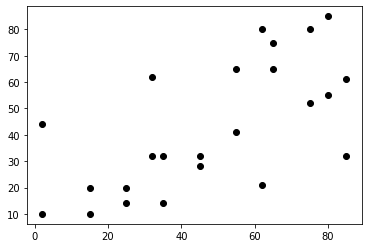

In [ ]:
receita = np.array([2,15,25,35,45,55,65,75,80,85,32,62,2,15,25,35,45,55,65,75,80,85,32,62])
despesa=  np.array([10,20,14,32,28,41,65,52,55,61,32,21,44,10,20,14,32,65,75,80,85,32,62,80])
plt.scatter(receita, despesa, color = 'black')
plt.show

Coefficients: /n [0.60601994]
Intercep: /n 13.827709611451937


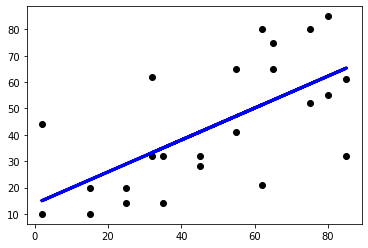

In [ ]:
receita = np.array([2,15,25,35,45,55,65,75,80,85,32,62,2,15,25,35,45,55,65,75,80,85,32,62])
despesa=  np.array([10,20,14,32,28,41,65,52,55,61,32,21,44,10,20,14,32,65,75,80,85,32,62,80])
regr = linear_model.LinearRegression()
regr.fit(receita.reshape(-1,1),despesa)
y = regr.predict(receita.reshape(-1,1))

print('Coefficients: /n', regr.coef_)
print('Intercep: /n', regr.intercept_)
plt.scatter(receita,despesa, color ='black')
plt.plot(receita, y, color='blue', linewidth=3)
